## Imports

In [1]:
import numpy as np
import pandas as pd
import os, sys

sys.path.append(os.path.abspath(f".."))
print(sys.path)
from HW2.helpers import *
from HW3.helpers import read_describe_with_timestamp

['/Users/hyeonbeen/Git/Lectures/BigDataApplication/HW3', '/Users/hyeonbeen/miniconda3/envs/bigdata/lib/python310.zip', '/Users/hyeonbeen/miniconda3/envs/bigdata/lib/python3.10', '/Users/hyeonbeen/miniconda3/envs/bigdata/lib/python3.10/lib-dynload', '', '/Users/hyeonbeen/miniconda3/envs/bigdata/lib/python3.10/site-packages', '/Users/hyeonbeen/Git/Lectures/BigDataApplication']


## Convert
Gonna convert the given horribly slow ```xlsx``` format data to ```csv``` format

In [2]:
# convert_to_csv()


## Read and describe
Read and concat as ```pd.DataFrame```, no need to deal with each ```pd.Series```

In [3]:
series_list, df = read_describe_with_timestamp()

Outdoor_WindDirection
Outdoor_WindSpeed
LivingRoom_Luminance
Cooling_Energy
Outdoor_Radiation
Outdoor_DryBulb
LivingRoom_Window1_Opening
Outdoor_Humidity
Electric_Energy
LivingRoom_Window2_Opening
Heating_Energy
LivingRoom_Air_Temperature


## Hourly resample and modify ```df``` in-place

In [4]:
df = df.resample('1H', on='TimeStamp').mean()

## Cleansing and checking missing values
Check if there're NaNs and fill them with 0

In [5]:
df_fix = cleansing(df)

Found 0 missing values from dataset


## Outlier detection
Detect and clip outlier values based on quantile of range $[0.001, 0.999]$

In [6]:
df_fix = outliers_quantile(df_fix)

[Cooling_Energy] clipping range 0.001~4.988 to 0.001~3.481, processed 6252/8760 outliers
[Electric_Energy] clipping range 0.000~2.285 to 0.126~1.773, processed 20/8760 outliers
[Heating_Energy] clipping range 0.001~4.120 to 0.001~3.363, processed 5047/8760 outliers
[LivingRoom_Air_Temperature] clipping range 19.969~33.005 to 20.265~30.709, processed 20/8760 outliers
[LivingRoom_Luminance] clipping range 0.000~27149.628 to 0.000~16475.408, processed 2172/8760 outliers
[LivingRoom_Window1_Opening] clipping range 0.000~1.000 to 0.000~1.000, processed 8381/8760 outliers
[LivingRoom_Window2_Opening] clipping range 0.000~1.000 to 0.000~1.000, processed 8265/8760 outliers
[Outdoor_DryBulb] clipping range -4.957~38.962 to -4.037~38.000, processed 20/8760 outliers
[Outdoor_Humidity] clipping range 15.520~99.340 to 20.932~98.068, processed 20/8760 outliers
[Outdoor_Radiation] clipping range 0.000~962.752 to 0.000~937.320, processed 26/8760 outliers
[Outdoor_WindDirection] clipping range 0.666~35

## Log transformation
For non-logit columns with pre-log values $0$, clip post-log value ```-inf``` to the second-smallest value  
For logit columns which has $0$ and $1$ only, clip post-log value ```-inf``` to $-1$  
to avoid NaNs.

In [7]:
df_fix_log = log_transformation(df_fix)
print(df_fix.describe())
print(df_fix_log.describe())


       Cooling_Energy  Electric_Energy  Heating_Energy  \
count     8760.000000      8760.000000     8760.000000   
mean         0.437309         0.256942        0.435668   
std          0.783016         0.197874        0.714877   
min          0.001000         0.126373        0.001000   
25%          0.001000         0.165834        0.001000   
50%          0.001000         0.192176        0.001000   
75%          0.615688         0.259699        0.684300   
max          3.480817         1.773292        3.363217   

       LivingRoom_Air_Temperature  LivingRoom_Luminance  \
count                 8760.000000           8760.000000   
mean                    23.530544            914.239462   
std                      1.528393           1560.549333   
min                     20.265123              0.000000   
25%                     22.519700              0.122074   
50%                     23.149600            168.111302   
75%                     24.409400           1259.992071   
max  

## Evaluate normality
Using Shapiro-Wilk test method, determined to be normal if $p \geq 0.05$

In [8]:
normality_test(df_fix)
normality_test(df_fix_log)

(NOT normal)Cooling_Energy: 0.0000e+00
(NOT normal)Electric_Energy: 0.0000e+00
(NOT normal)Heating_Energy: 0.0000e+00
(NOT normal)LivingRoom_Air_Temperature: 0.0000e+00
(NOT normal)LivingRoom_Luminance: 0.0000e+00
(NOT normal)LivingRoom_Window1_Opening: 0.0000e+00
(NOT normal)LivingRoom_Window2_Opening: 0.0000e+00
(NOT normal)Outdoor_DryBulb: 3.0623e-36
(NOT normal)Outdoor_Humidity: 0.0000e+00
(NOT normal)Outdoor_Radiation: 0.0000e+00
(NOT normal)Outdoor_WindDirection: 1.4013e-45
(NOT normal)Outdoor_WindSpeed: 0.0000e+00
(Normal)Arbitrary np.randn: 7.6525e-01
(NOT normal)Cooling_Energy: 0.0000e+00
(NOT normal)Electric_Energy: 0.0000e+00
(NOT normal)Heating_Energy: 0.0000e+00
(NOT normal)LivingRoom_Air_Temperature: 3.2448e-40
(NOT normal)LivingRoom_Luminance: 0.0000e+00
(NOT normal)LivingRoom_Window1_Opening: 0.0000e+00
(NOT normal)LivingRoom_Window2_Opening: 0.0000e+00
(Normal)Outdoor_DryBulb: 1.0000e+00
(NOT normal)Outdoor_Humidity: 0.0000e+00
(NOT normal)Outdoor_Radiation: 0.0000e+00

## Cross and auto-correlations
Standardize data by ```stdize(df)```
- Linearity measured by Pearson correlation coefficients $\in[-1,1]$  
- Monotonicity measured by Spearman correlation coefficients $\in[-1,1]$  

Note that all matrices are symmetric, and diagonals(autocorrelation) are $1$

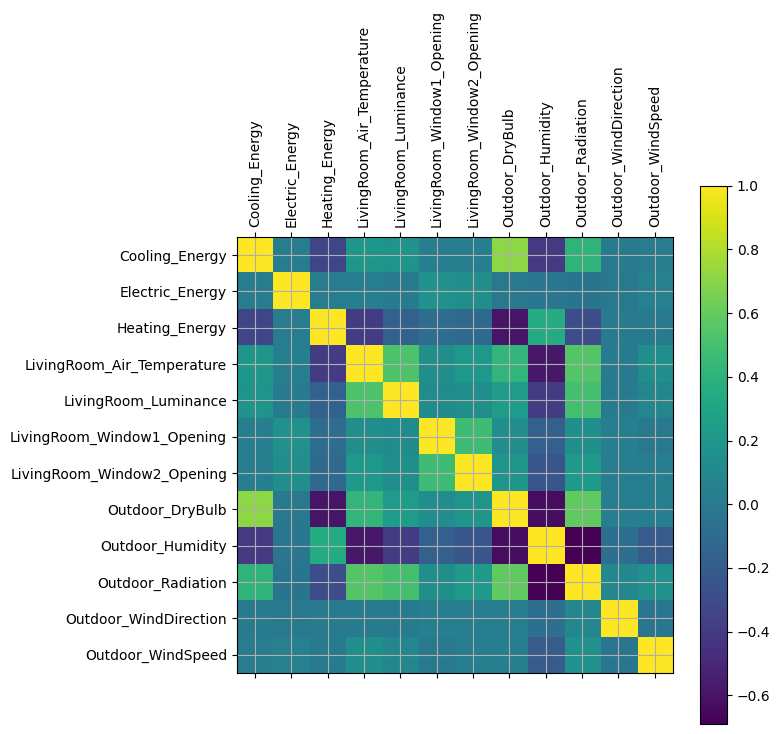

[[ 1.     0.027 -0.338  0.206  0.182  0.035  0.04   0.712 -0.409  0.408
   0.009  0.016]
 [ 0.027  1.     0.016  0.039  0.003  0.162  0.147 -0.013 -0.026 -0.03
  -0.008  0.045]
 [-0.338  0.016  1.    -0.387 -0.167 -0.089 -0.112 -0.591  0.35  -0.291
  -0.002  0.002]
 [ 0.206  0.039 -0.387  1.     0.526  0.142  0.211  0.422 -0.582  0.551
   0.012  0.154]
 [ 0.182  0.003 -0.167  0.526  1.     0.13   0.151  0.24  -0.387  0.5
   0.013  0.087]
 [ 0.035  0.162 -0.089  0.142  0.13   1.     0.477  0.139 -0.172  0.154
   0.037 -0.009]
 [ 0.04   0.147 -0.112  0.211  0.151  0.477  1.     0.193 -0.236  0.216
   0.031  0.03 ]
 [ 0.712 -0.013 -0.591  0.422  0.24   0.139  0.193  1.    -0.637  0.584
   0.033  0.037]
 [-0.409 -0.026  0.35  -0.582 -0.387 -0.172 -0.236 -0.637  1.    -0.69
  -0.07  -0.204]
 [ 0.408 -0.03  -0.291  0.551  0.5    0.154  0.216  0.584 -0.69   1.
   0.091  0.167]
 [ 0.009 -0.008 -0.002  0.012  0.013  0.037  0.031  0.033 -0.07   0.091
   1.    -0.027]
 [ 0.016  0.045  0.002  0.15

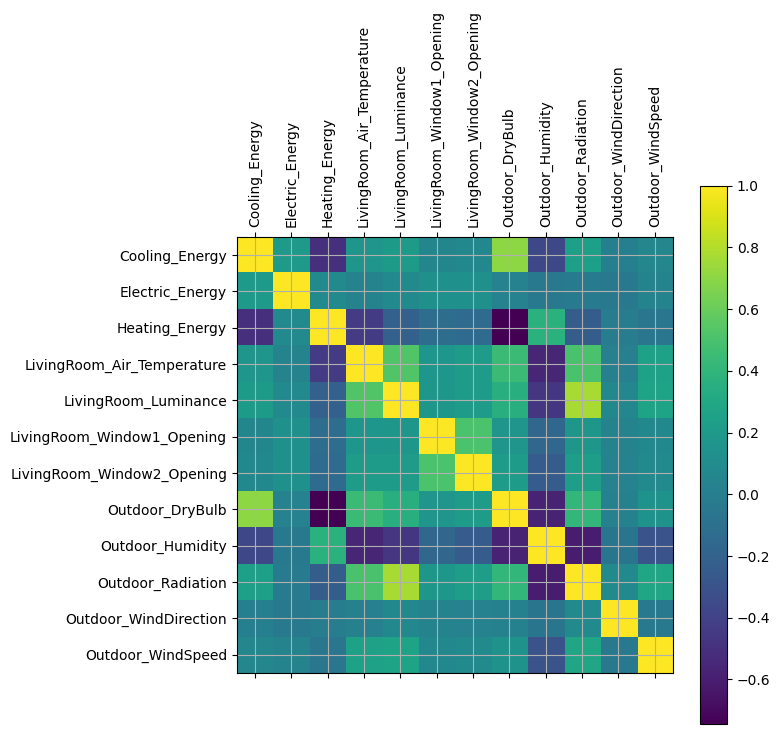

[[ 1.     0.192 -0.504  0.165  0.206  0.054  0.071  0.706 -0.366  0.237
   0.008  0.06 ]
 [ 0.192  1.     0.082  0.036  0.081  0.129  0.13   0.031 -0.042 -0.025
  -0.041  0.036]
 [-0.504  0.082  1.    -0.434 -0.208 -0.118 -0.136 -0.745  0.373 -0.233
  -0.003 -0.058]
 [ 0.165  0.036 -0.434  1.     0.524  0.172  0.219  0.446 -0.561  0.502
   0.013  0.255]
 [ 0.206  0.081 -0.208  0.524  1.     0.179  0.211  0.349 -0.472  0.774
   0.069  0.265]
 [ 0.054  0.129 -0.118  0.172  0.179  1.     0.509  0.166 -0.172  0.18
   0.037  0.067]
 [ 0.071  0.13  -0.136  0.219  0.211  0.509  1.     0.213 -0.239  0.231
   0.031  0.087]
 [ 0.706  0.031 -0.745  0.446  0.349  0.166  0.213  1.    -0.577  0.409
   0.023  0.143]
 [-0.366 -0.042  0.373 -0.561 -0.472 -0.172 -0.239 -0.577  1.    -0.615
  -0.065 -0.297]
 [ 0.237 -0.025 -0.233  0.502  0.774  0.18   0.231  0.409 -0.615  1.
   0.088  0.287]
 [ 0.008 -0.041 -0.003  0.013  0.069  0.037  0.031  0.023 -0.065  0.088
   1.    -0.038]
 [ 0.06   0.036 -0.058  0

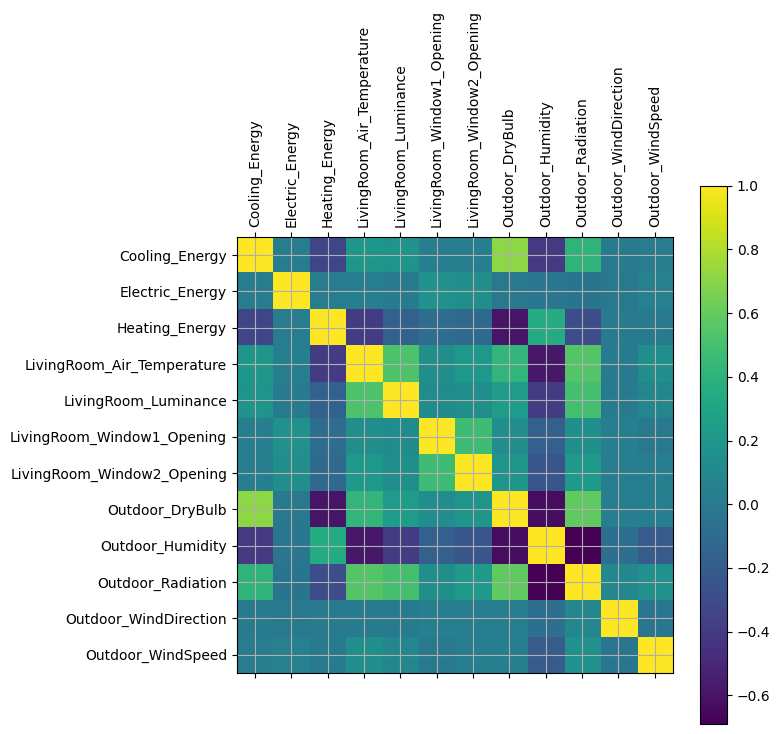

[[ 1.     0.027 -0.338  0.206  0.182  0.035  0.04   0.712 -0.409  0.408
   0.009  0.016]
 [ 0.027  1.     0.016  0.039  0.003  0.162  0.147 -0.013 -0.026 -0.03
  -0.008  0.045]
 [-0.338  0.016  1.    -0.387 -0.167 -0.089 -0.112 -0.591  0.35  -0.291
  -0.002  0.002]
 [ 0.206  0.039 -0.387  1.     0.526  0.142  0.211  0.422 -0.582  0.551
   0.012  0.154]
 [ 0.182  0.003 -0.167  0.526  1.     0.13   0.151  0.24  -0.387  0.5
   0.013  0.087]
 [ 0.035  0.162 -0.089  0.142  0.13   1.     0.477  0.139 -0.172  0.154
   0.037 -0.009]
 [ 0.04   0.147 -0.112  0.211  0.151  0.477  1.     0.193 -0.236  0.216
   0.031  0.03 ]
 [ 0.712 -0.013 -0.591  0.422  0.24   0.139  0.193  1.    -0.637  0.584
   0.033  0.037]
 [-0.409 -0.026  0.35  -0.582 -0.387 -0.172 -0.236 -0.637  1.    -0.69
  -0.07  -0.204]
 [ 0.408 -0.03  -0.291  0.551  0.5    0.154  0.216  0.584 -0.69   1.
   0.091  0.167]
 [ 0.009 -0.008 -0.002  0.012  0.013  0.037  0.031  0.033 -0.07   0.091
   1.    -0.027]
 [ 0.016  0.045  0.002  0.15

In [9]:
pearson = pearson_corr(stdize(df_fix))
visualize_corr(pearson, df_fix)


spearman = spearman_corr(stdize(df_fix))
visualize_corr(spearman, df_fix)

cov = np.cov(stdize(df_fix).T)
visualize_corr(cov, df_fix)

## Trend-seasonal decomposition using simple moving average

In [10]:
trend, seasonal = decompose(df_fix)

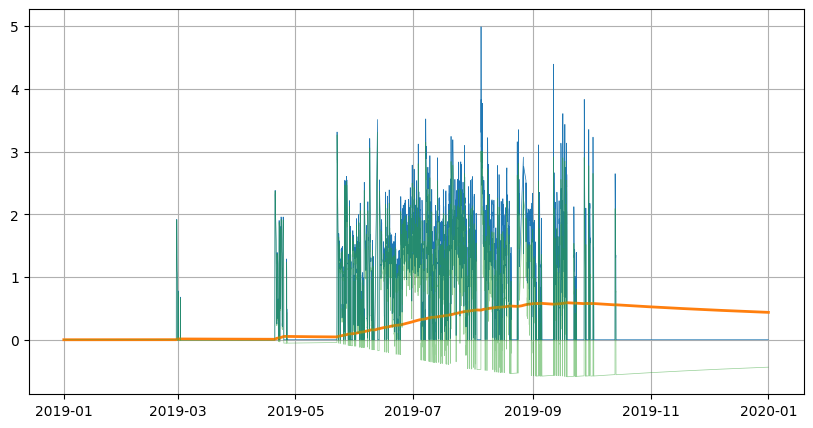

In [11]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df["Cooling_Energy"], lw=0.5)
ax.plot(trend["Cooling_Energy"], lw=2)
ax.plot(seasonal["Cooling_Energy"], lw=0.5, alpha=0.5)
ax.grid()

## Measure strength of trend and seasonal components based on variation

In [12]:
Ft, Fs = measure_ts_strength(trend, seasonal)
print(Ft) # strength of trend
print()
print(Fs) # strength of seasonality

Cooling_Energy                0.043265
Electric_Energy               0.000687
Heating_Energy                0.101591
LivingRoom_Air_Temperature    0.007666
LivingRoom_Luminance          0.001078
LivingRoom_Window1_Opening    0.000662
LivingRoom_Window2_Opening    0.001355
Outdoor_DryBulb               0.150884
Outdoor_Humidity              0.000559
Outdoor_Radiation             0.005326
Outdoor_WindDirection         0.003806
Outdoor_WindSpeed             0.026063
dtype: float64

Cooling_Energy                0.043265
Electric_Energy               0.000687
Heating_Energy                0.101591
LivingRoom_Air_Temperature    0.007666
LivingRoom_Luminance          0.001078
LivingRoom_Window1_Opening    0.000662
LivingRoom_Window2_Opening    0.001355
Outdoor_DryBulb               0.150884
Outdoor_Humidity              0.000559
Outdoor_Radiation             0.005326
Outdoor_WindDirection         0.003806
Outdoor_WindSpeed             0.026063
dtype: float64


#